In [1]:
import numpy as np                #the documentations in the OOP part
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
BGR_img = cv.imread("Desktop/test1.png")
BGR_img.shape

(1080, 1362, 3)

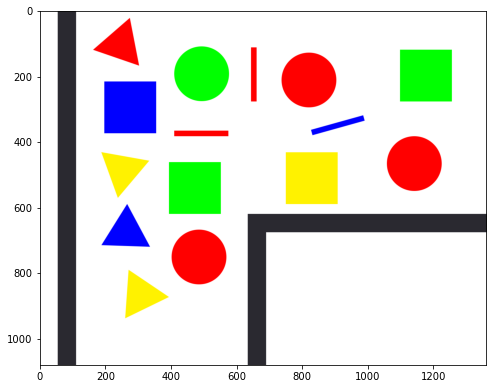

In [3]:
RGB_img = cv.cvtColor(BGR_img,cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(RGB_img)

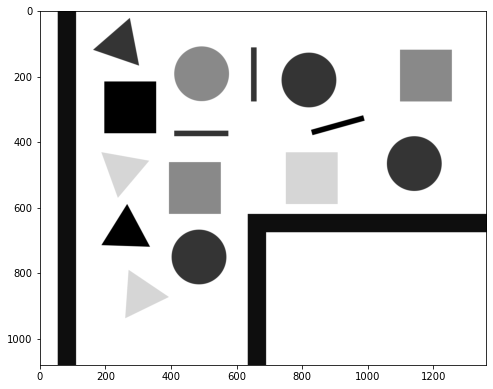

In [4]:
Gray_img = cv.cvtColor(BGR_img,cv.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(Gray_img,cmap='gray')

In [5]:
Red_lower = [0,0,50]
Red_upper = [50,50,255]
Blue_lower = [50,0,0]
Blue_upper = [255,50,50]
Green_lower = [0,50,0]
Green_upper = [50,255,50]
Yellow_lower = [0,220,220]
Yellow_upper = [100,255,255]
Black_lower = [0,0,0]
Black_upper = [100,100,100]

In [6]:
Red_mask = cv.inRange(BGR_img, np.array(Red_lower), np.array(Red_upper))
Green_mask = cv.inRange(BGR_img, np.array(Green_lower), np.array(Green_upper))
Blue_mask = cv.inRange(BGR_img, np.array(Blue_lower), np.array(Blue_upper))
Yellow_mask = cv.inRange(BGR_img, np.array(Yellow_lower), np.array(Yellow_upper))
Black_mask = cv.inRange(BGR_img, np.array(Black_lower), np.array(Black_upper))

In [7]:
contour,_ = cv.findContours(Red_mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

In [8]:
for i in contour:
    approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]+30
    cv.putText(BGR_img,"Red",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

In [9]:
contour,_ = cv.findContours(Green_mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

In [10]:
for i in contour:
    approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]+30
    cv.putText(BGR_img,"Green",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

In [11]:
contour,_ = cv.findContours(Blue_mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

In [12]:
for i in contour:
    approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]+30
    cv.putText(BGR_img,"Blue",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

In [13]:
contour,_ = cv.findContours(Yellow_mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

In [14]:
for i in contour:
    approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]+30
    cv.putText(BGR_img,"Yellow",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

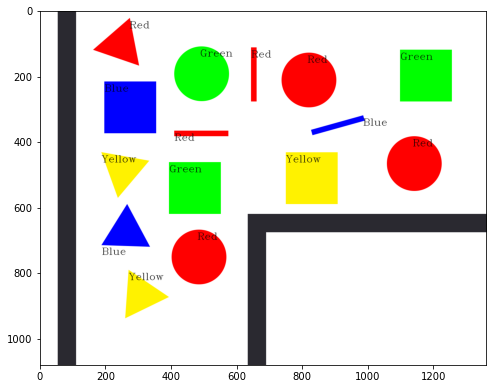

In [15]:
colors = cv.cvtColor(BGR_img,cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(colors)

In [16]:
contour,_ = cv.findContours(Black_mask,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
for i in contour:
    approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)
    if len(approx)>4:
        x, y = 0, 0
        for j in range(len(approx)):
            if y==0:
                if (BGR_img.shape[1]-approx[j][0][0])<3:
                    y = 2
                elif approx[j][0][0]<3:
                    y = 1
            if x==0:
                if (BGR_img.shape[0]-approx[j][0][1])<3:
                    x = 2
                elif approx[j][0][1]<3:
                    x = 1
        if y == 1 and (x == 1 or x == 2):
            cv.putText(BGR_img,"Left",(int(BGR_img.shape[1]/2),50),cv.FONT_HERSHEY_COMPLEX,2,(0,0,0))
        elif y == 2 and (x == 1 or x == 2):
            cv.putText(BGR_img,"Right",(int(BGR_img.shape[1]/2),50),cv.FONT_HERSHEY_COMPLEX,2,(0,0,0))

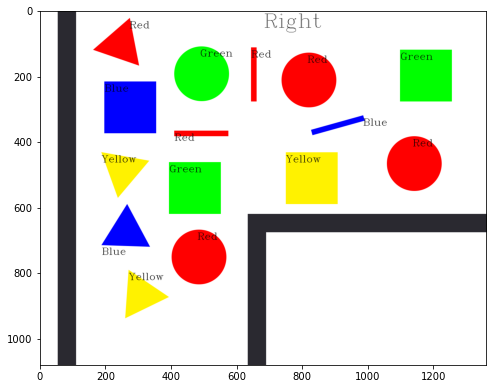

In [17]:
path = cv.cvtColor(BGR_img,cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(path)

In [18]:
_,thresh = cv.threshold(Gray_img,240,255,cv.THRESH_BINARY)
contour,_ = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)

In [19]:
for i in contour:
    approx = cv.approxPolyDP(i,0.01*cv.arcLength(i,True),True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 3:
        cv.putText(BGR_img,"Triangle",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
    elif len(approx) == 4:
        _, __, w, h = cv.boundingRect(approx)
        if w/h >= 0.9 and w/h <= 1.1:
            cv.putText(BGR_img,"Square",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
        else:
            cv.putText(BGR_img,"Rectangle",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))
    else:
        cv.putText(BGR_img,"Cirlce",(x,y),cv.FONT_HERSHEY_COMPLEX,1,(0,0,0))

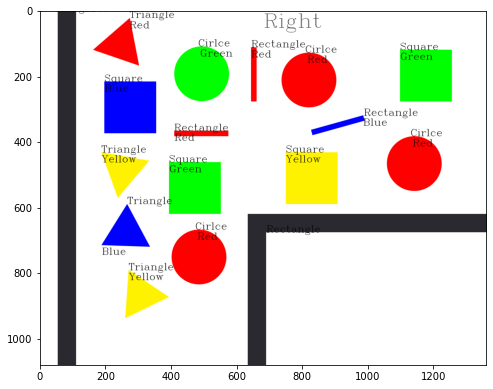

In [20]:
RGB_img = cv.cvtColor(BGR_img,cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(RGB_img)